In [1]:
import pandas as pd
import numpy as np


data_path = 'C:/coding/python/3rd/jupyter/Daejeon_bike/'
data = pd.read_csv(data_path + 'all_data.csv', index_col='id')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6928 entries, 1 to 8301
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        6928 non-null   int64  
 1   day          6928 non-null   int64  
 2   hour         6928 non-null   int64  
 3   temperature  6928 non-null   float64
 4   windspeed    6915 non-null   float64
 5   humidity     6928 non-null   float64
 6   visibility   6928 non-null   int64  
 7   holiday      6928 non-null   int64  
 8   workingday   6928 non-null   int64  
 9   season       6928 non-null   int64  
 10  count        6928 non-null   object 
dtypes: float64(3), int64(7), object(1)
memory usage: 649.5+ KB


In [3]:
# 'count' 열을 문자열로 변환
data['count'] = data['count'].astype(str)

# 쉼표 제거
data['count'] = data['count'].str.replace(',', '')

# 'count' 열을 int64로 변환
data['count'] = data['count'].astype('int64')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6928 entries, 1 to 8301
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month        6928 non-null   int64  
 1   day          6928 non-null   int64  
 2   hour         6928 non-null   int64  
 3   temperature  6928 non-null   float64
 4   windspeed    6915 non-null   float64
 5   humidity     6928 non-null   float64
 6   visibility   6928 non-null   int64  
 7   holiday      6928 non-null   int64  
 8   workingday   6928 non-null   int64  
 9   season       6928 non-null   int64  
 10  count        6928 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 649.5 KB


In [5]:
data.head()

,month,day,hour,temperature,windspeed,humidity,visibility,holiday,workingday,season,count
id,,,,,,,,,,,
1,1,1,5,-4.7,0.2,83.0,954,1,0,4,48
2,1,1,6,-4.9,1.2,83.0,931,1,0,4,51
3,1,1,7,-4.8,1.1,86.0,859,1,0,4,48
4,1,1,8,-4.9,0.7,85.0,883,1,0,4,94
5,1,1,9,-3.6,0.6,83.0,908,1,0,4,95


In [6]:
data.tail()

,month,day,hour,temperature,windspeed,humidity,visibility,holiday,workingday,season,count
id,,,,,,,,,,,
8297,12,31,19,3.1,1.4,82.0,1094,0,1,4,432
8298,12,31,20,2.9,0.1,82.0,1167,0,1,4,423
8299,12,31,21,2.9,0.9,82.0,1177,0,1,4,386
8300,12,31,22,2.8,0.1,83.0,1141,0,1,4,370
8301,12,31,23,2.9,0.1,81.0,1243,0,1,4,371


<Axes: >

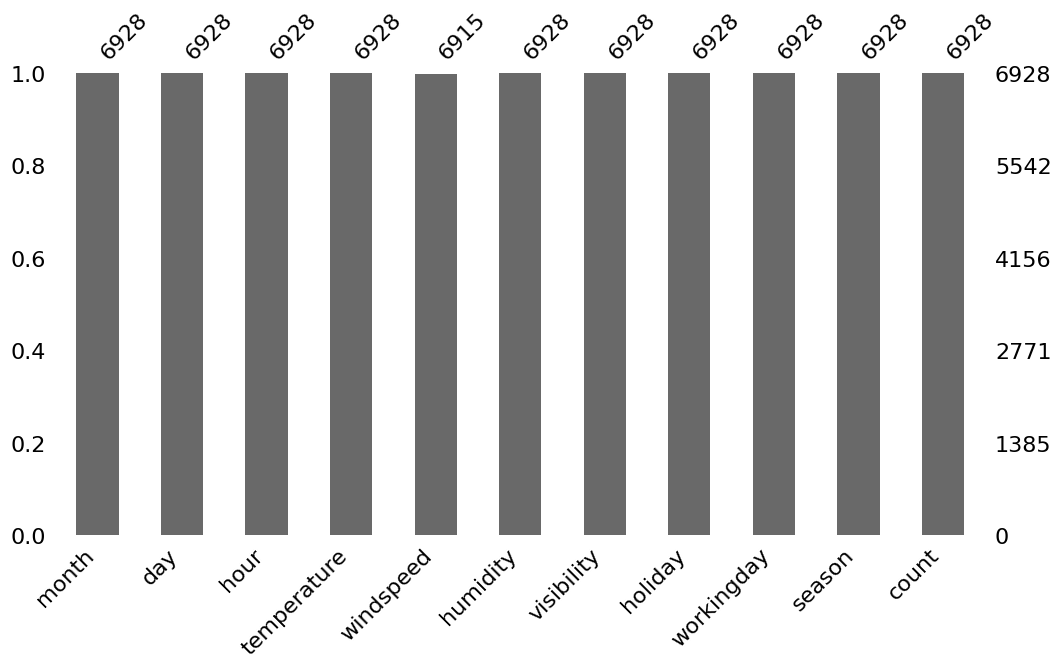

In [7]:
import missingno as msno
msno.bar(df=data, figsize=(12,6))

<Axes: >

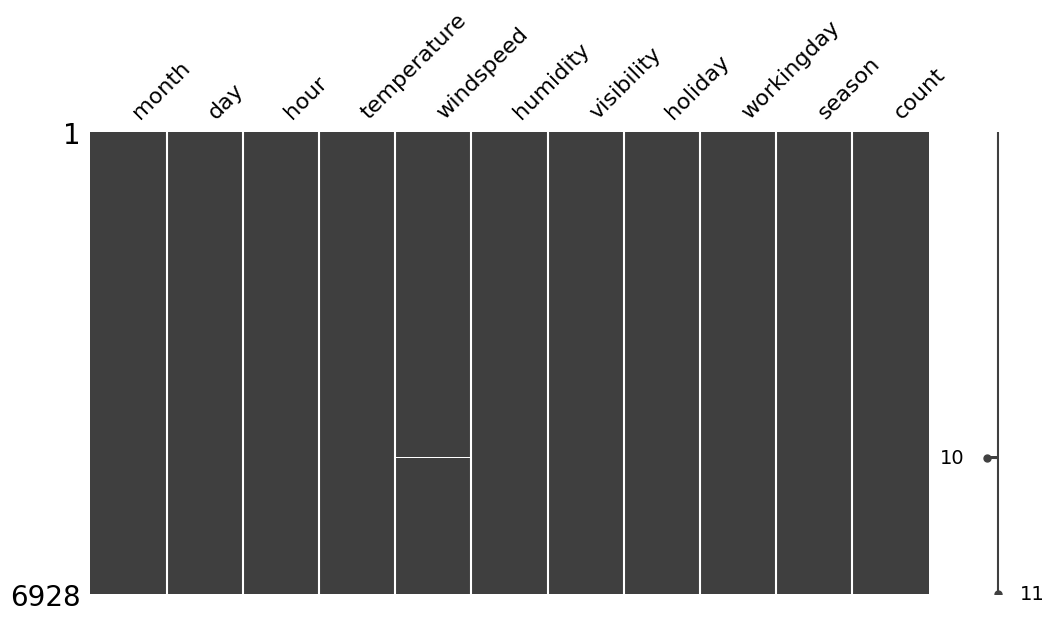

In [19]:
msno.matrix(df=data, figsize=(12,6))

windspeed(풍속)에서 10개 정도 비는 것을 확인

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

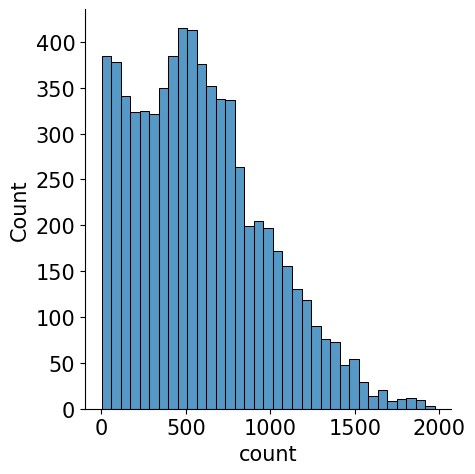

In [10]:
mpl.rc('font', size=15)
sns.displot(data['count'])

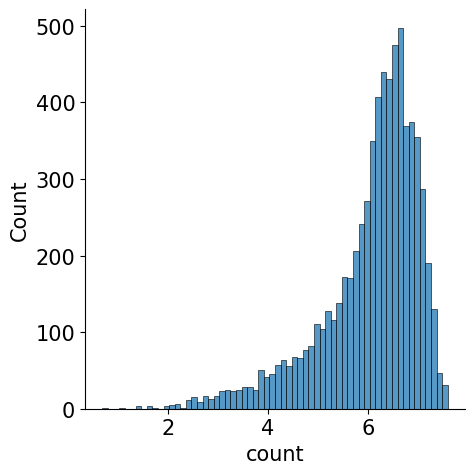

In [11]:
sns.displot(np.log(data['count']))

<Axes: xlabel='hour', ylabel='count'>

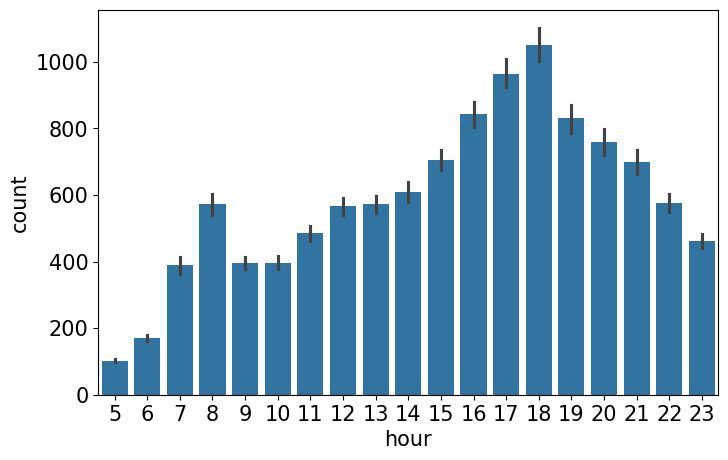

In [12]:
plt.figure(figsize = (8,5))
sns.barplot(x='hour', y='count', data=data)

<Axes: xlabel='month', ylabel='count'>

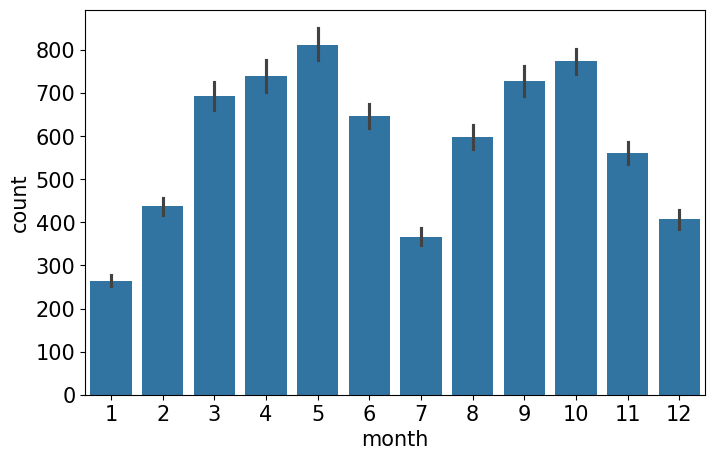

In [13]:
plt.figure(figsize = (8,5))
sns.barplot(x='month', y='count', data=data)

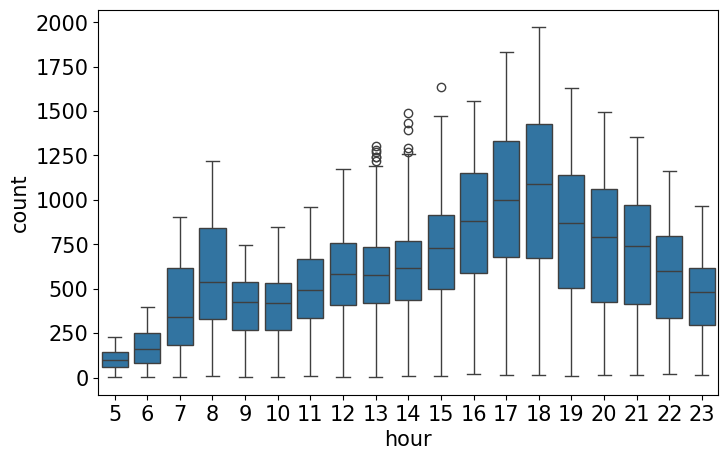

In [14]:
plt.figure(figsize = (8,5))
ax = sns.boxplot(x='hour', y='count', data=data)

<Axes: xlabel='visibility', ylabel='count'>

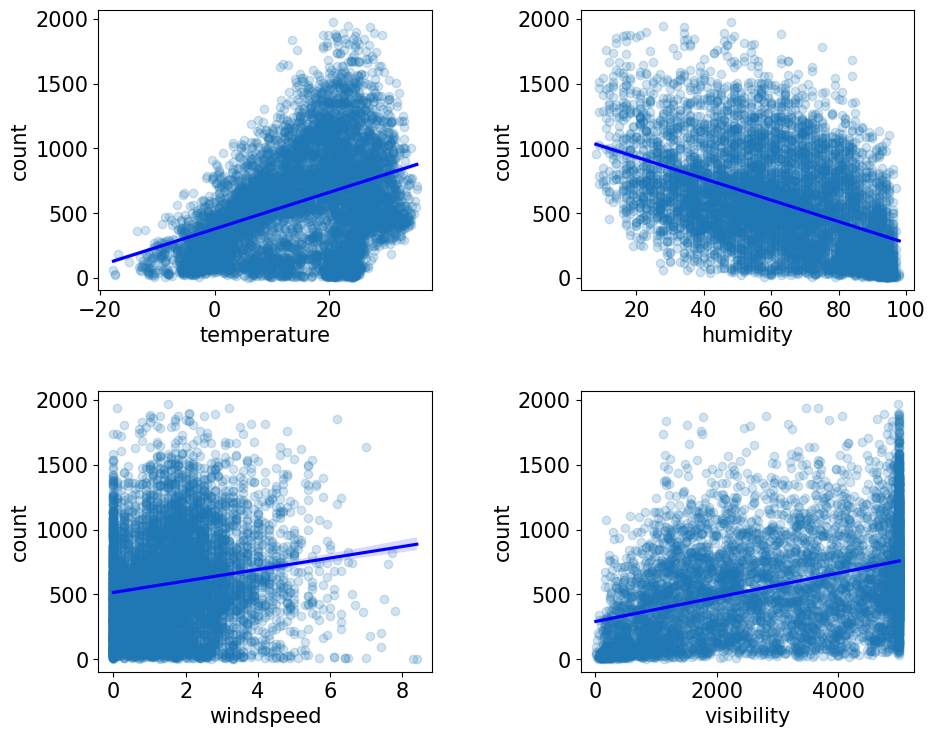

In [15]:
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(10,8)

sns.regplot(x='temperature', y='count', data=data, ax=axes[0,0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=data, ax=axes[0,1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=data, ax=axes[1,0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='visibility', y='count', data=data, ax=axes[1,1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

In [16]:
data[['temperature', 'humidity', 'windspeed', 'visibility', 'count']].corr()

,temperature,humidity,windspeed,visibility,count
temperature,1.000000,0.060151,0.012614,0.211051,0.389613
humidity,0.060151,1.000000,-0.335422,-0.465676,-0.467924
windspeed,0.012614,-0.335422,1.000000,0.204753,0.151794
visibility,0.211051,-0.465676,0.204753,1.000000,0.403752
count,0.389613,-0.467924,0.151794,0.403752,1.000000


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

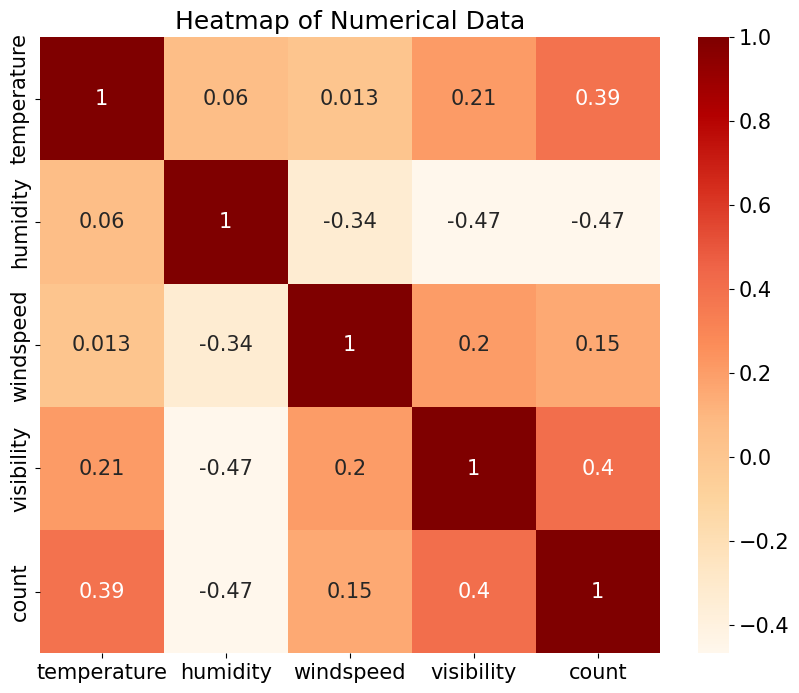

In [17]:
plt.figure(figsize=(10,8))
corrMat = data[['temperature', 'humidity', 'windspeed', 'visibility', 'count']].corr()
ax = sns.heatmap(corrMat, annot=True, cmap='OrRd')
ax.set(title='Heatmap of Numerical Data')

<Axes: >

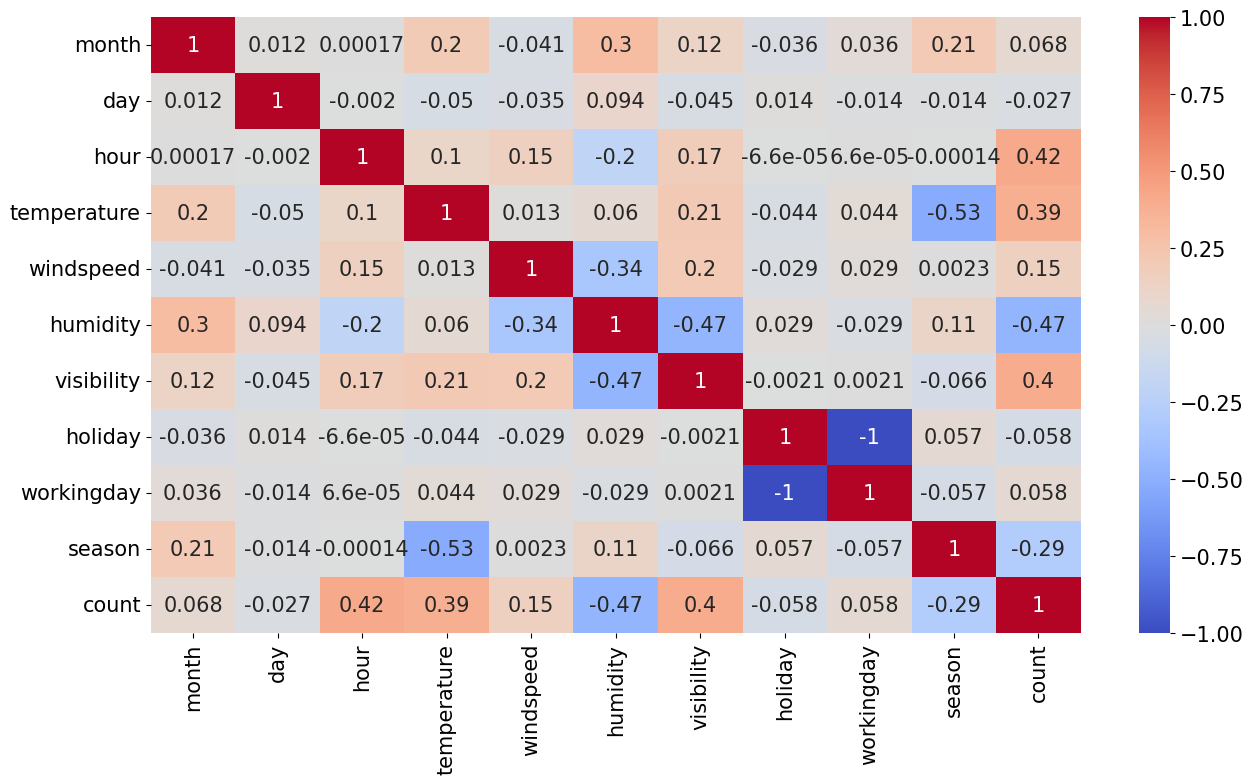

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

뭔가 쎄하다.  
자료수가 부족했나.  
아니면 제공되는 정보의 질이 이상한건가.